## Import the necessary libraries

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
sns.set(style="darkgrid")
%matplotlib inline

## Get the data

In [108]:
df_veh = pd.read_csv('vehicle.csv')

## Find out the head , shape, summary and datatypes of the data

In [3]:
df_veh.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [7]:
df_veh.shape

(813, 19)

In [26]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [27]:
print("Any missing null values in data set =", df_veh.isnull().values.sum())
print("Any missing NA values in data set =", df_veh.isna().values.sum())

Any missing null values in data set = 41
Any missing NA values in data set = 41


In [28]:
df_veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#From above we can see that except 'class' column all columns are numeric type and there are null values in some columns. class column is our target column.

#From above we can see that max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'. so we have two options either we will drop those null values or we will impute those null values. Dropping null values is not a good way because we will lose some information.but we will go with both options then we will see what's the effect on model.

In [6]:
# dataframe.size 
Size = df_veh.size 
  
# dataframe.shape 
Shape = df_veh.shape 
  
# dataframe.ndim 
Ndim = df_veh.ndim 
  

# printing size and shape 
print("Total Size of the data = {}\nShape of the data ={}\nShape[0] x Shape[1] = {}". 
format(Size, Shape, Shape[0]*Shape[1])) 
  
# printing ndim 
print("Dimensions of dataframe = {}". 
format(Ndim))

Total Size of the data = 16074
Shape of the data =(846, 19)
Shape[0] x Shape[1] = 16074
Dimensions of dataframe = 2


In [7]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df_veh['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
df_veh['circularity'].unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [35]:
df_veh.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   
full_count                   813.0   20.000000    0.000000   20.0   20.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
full_count                    20.0   20.0    20.0

In [109]:
df_veh_OnlyY = df_veh.pop('class')


In [110]:
df_veh_OnlyY
df_veh.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [117]:
df_veh.fillna(df_veh.median(),axis=0,inplace=True)
df_veh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

#Now the missing values are treated with Median and no further missing values.

In [56]:
print("Any missing null values in data set =", df_veh.isnull().values.sum())
print("Any missing NA values in data set =", df_veh.isna().values.sum())

Any missing null values in data set = 0
Any missing NA values in data set = 0


In [57]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [59]:
df_veh.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [60]:
df_veh.isnull().values.any()

False

In [ ]:
df_veh = df_veh.join(df_veh_OnlyY)

In [73]:
df_veh.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [46]:
df_veh.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            205          205                   205           205   
car            413          413                   413           413   
van            195          195                   195           195   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     205                      205            205   
car                     413                      413            413   
van                     195                      195            195   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              205                     205                        205   
car              413                     413                        413   
van              195                     195                        195   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                205                205                        205   
car                413                413                        413   
van                195                195                        195   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            205             205               205   
car                            413             413               413   
van                            195             195               195   

       skewness_about.2  hollows_ratio  
class                                   
bus                 205            205  
car                 413            413  
van                 195            195

In [49]:
sizes = df_veh["class"].value_counts()
sizes

car    413
bus    205
van    195
Name: class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED08838320>,
      dtype=object)

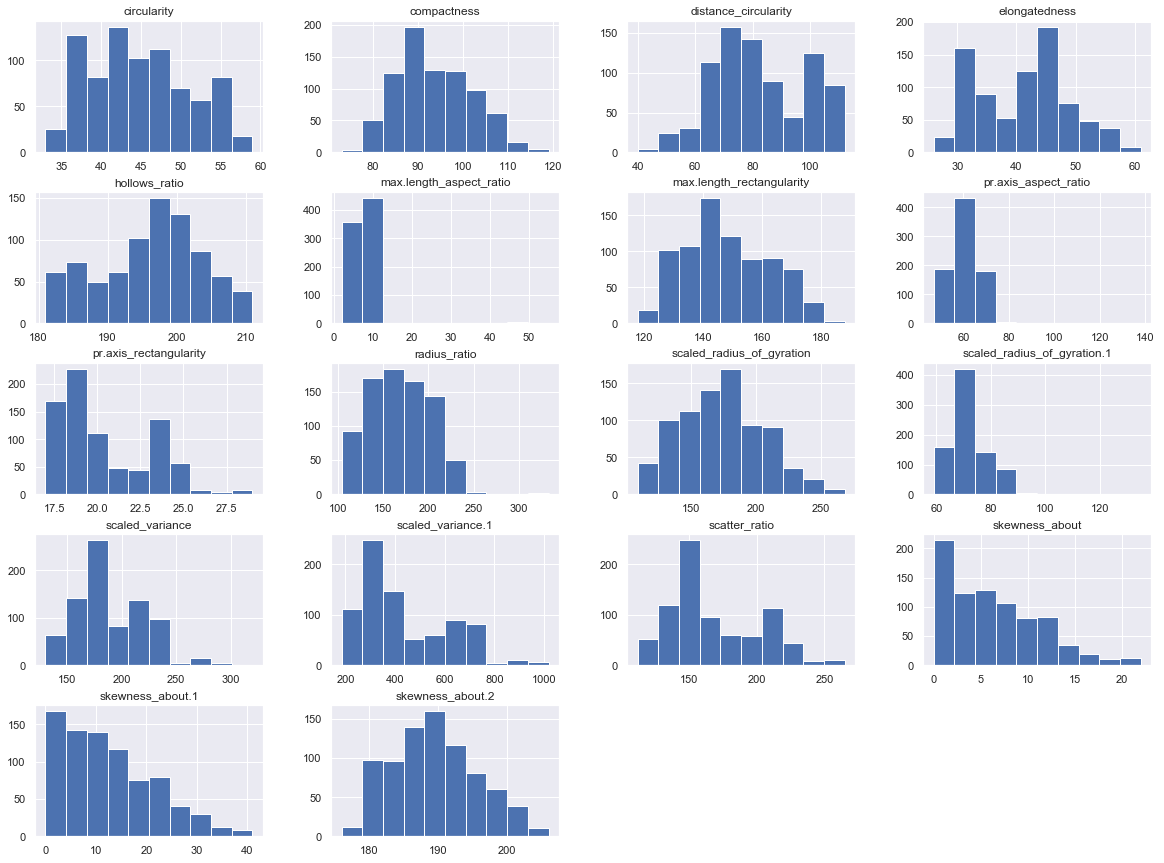

In [57]:
df_veh.hist(figsize=(20,15))

#Can observer all the varibales have skewed.

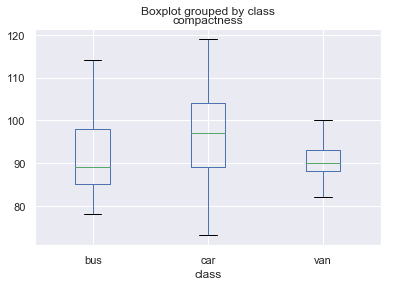

In [61]:
df_veh.boxplot(column="compactness" , by="class")

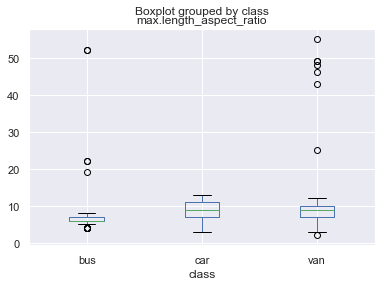

In [62]:
df_veh.boxplot(column="max.length_aspect_ratio" , by="class")

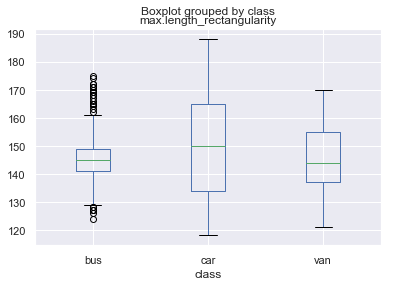

In [63]:
df_veh.boxplot(column="max.length_rectangularity" , by="class")

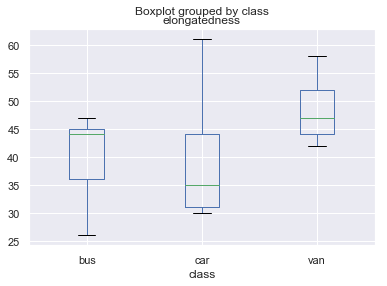

In [64]:
df_veh.boxplot(column="elongatedness" , by="class")

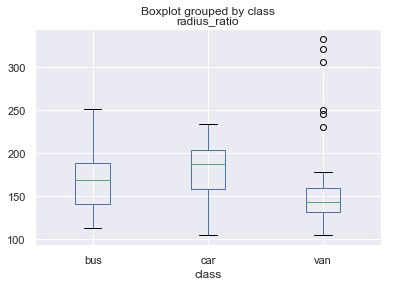

In [65]:
df_veh.boxplot(column="radius_ratio" , by="class")

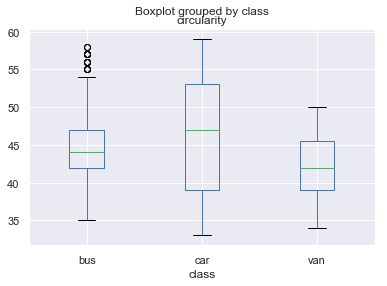

In [66]:
df_veh.boxplot(column="circularity" , by="class")

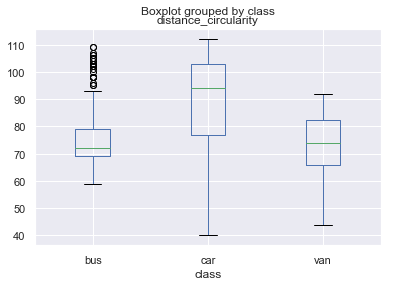

In [67]:
df_veh.boxplot(column="distance_circularity" , by="class")

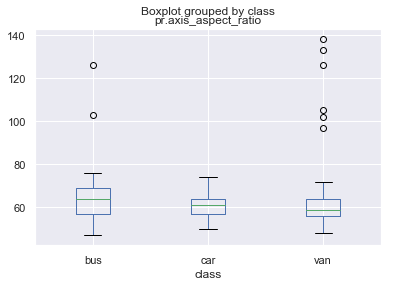

In [68]:
df_veh.boxplot(column="pr.axis_aspect_ratio" , by="class")

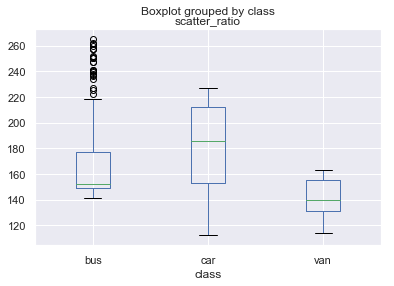

In [69]:
df_veh.boxplot(column="scatter_ratio" , by="class")

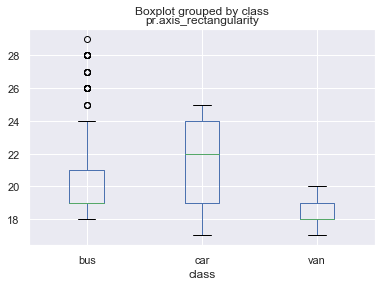

In [70]:
df_veh.boxplot(column="pr.axis_rectangularity" , by="class")

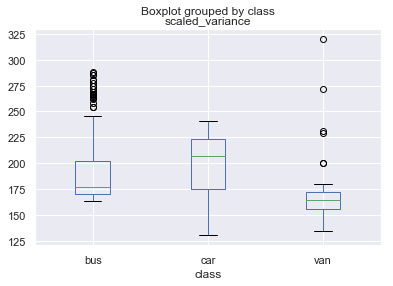

In [71]:
df_veh.boxplot(column="scaled_variance" , by="class")

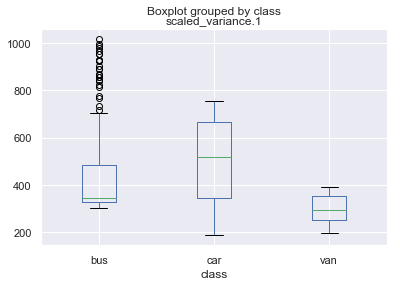

In [72]:
df_veh.boxplot(column="scaled_variance.1" , by="class")

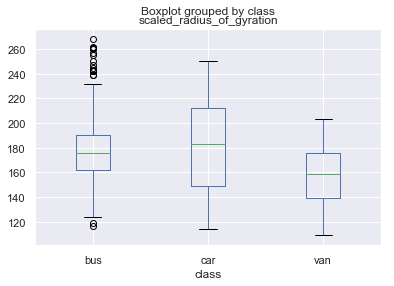

In [73]:
df_veh.boxplot(column="scaled_radius_of_gyration" , by="class")

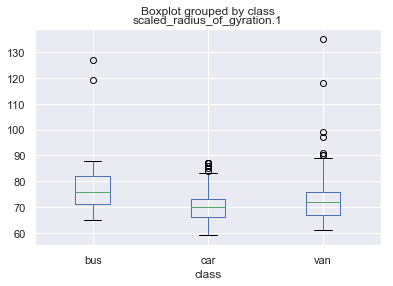

In [74]:
df_veh.boxplot(column="scaled_radius_of_gyration.1" , by="class")

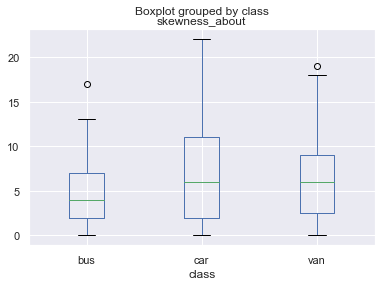

In [75]:
df_veh.boxplot(column="skewness_about" , by="class")

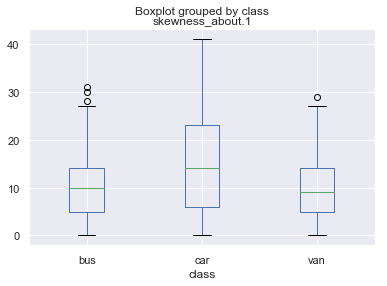

In [76]:
df_veh.boxplot(column="skewness_about.1" , by="class")

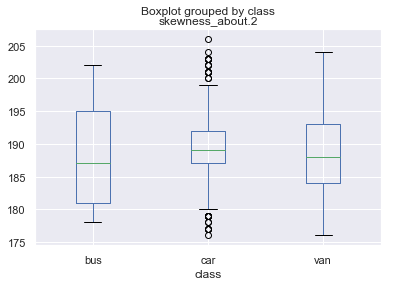

In [77]:
df_veh.boxplot(column="skewness_about.2" , by="class")

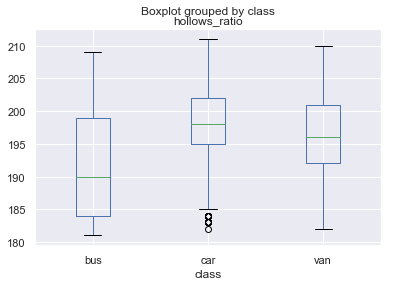

In [78]:
df_veh.boxplot(column="hollows_ratio" , by="class")

#There are outliears are presend in all the 18 variables, will need to treated further.

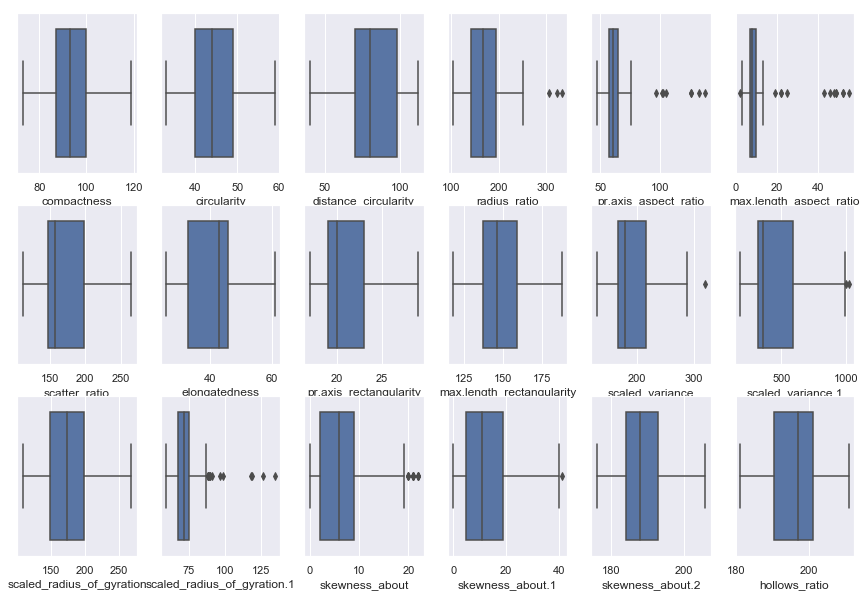

In [75]:
plt.figure(figsize=(15,10))
pos = 1
for i in df_veh.drop(columns = 'class').columns:
    plt.subplot(3, 6, pos)
    sns.boxplot(df_veh[i])
    pos += 1 

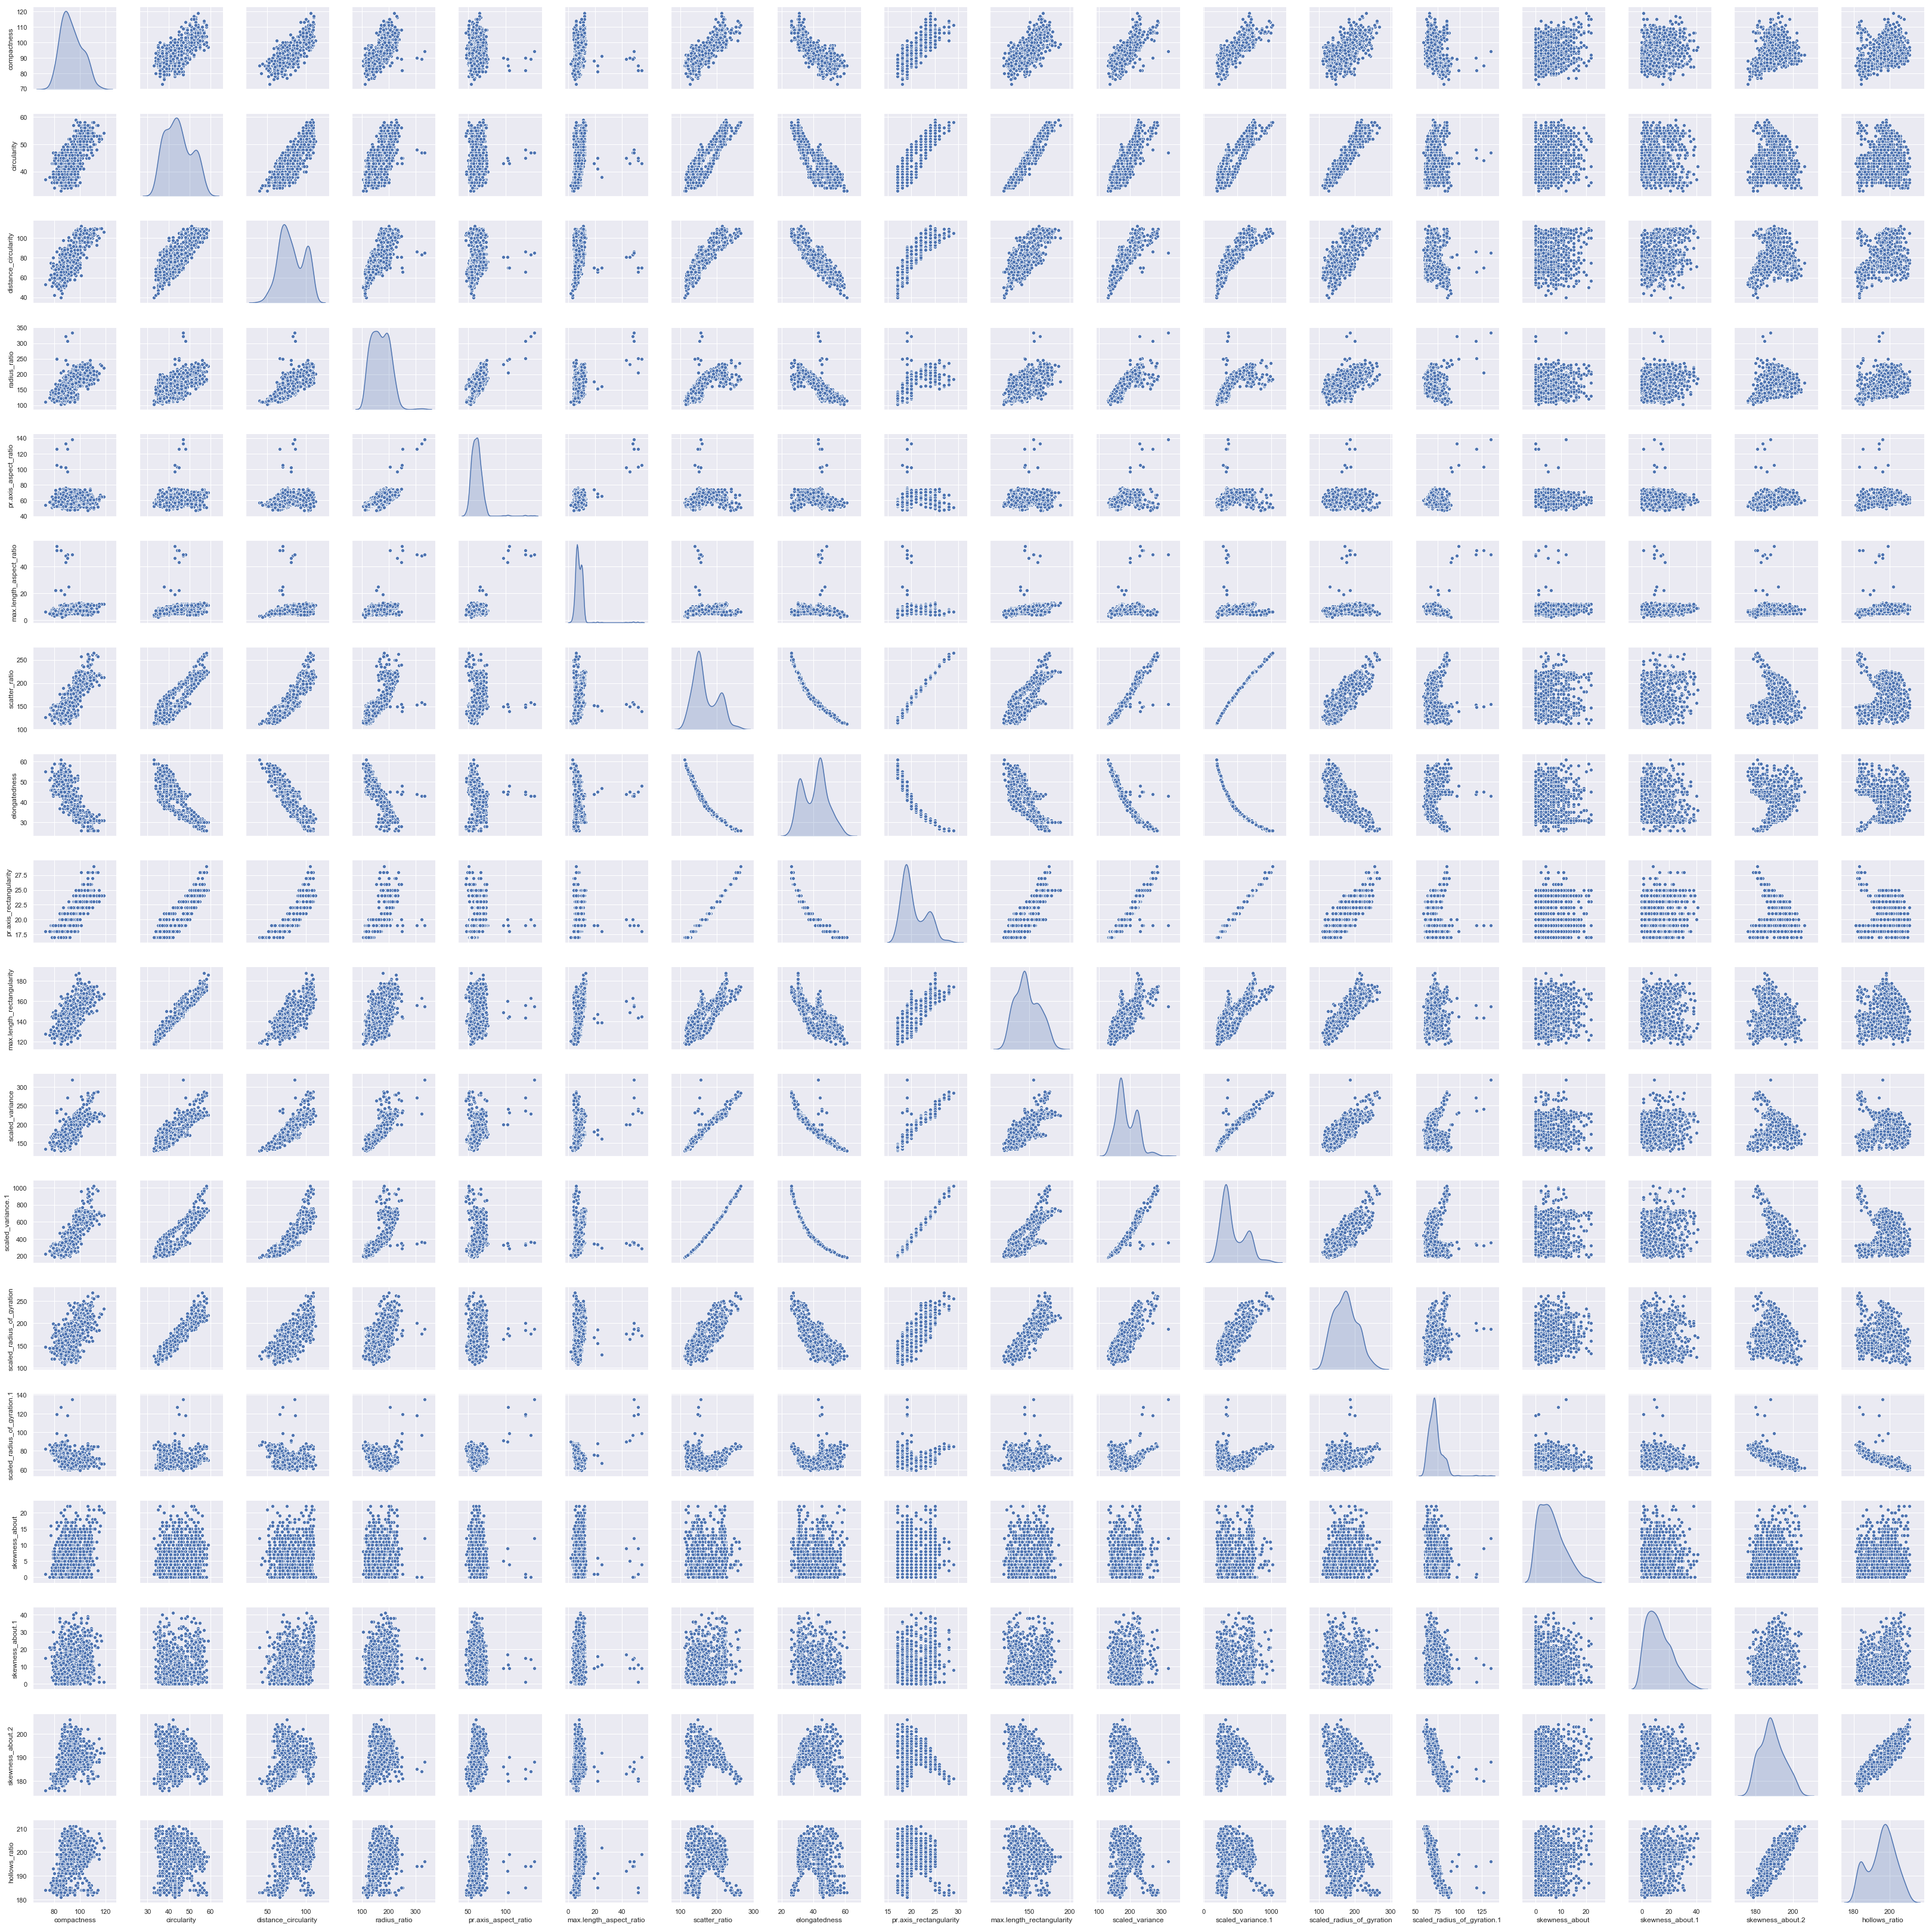

In [10]:
sns.pairplot(data =df_veh, diag_kind='kde')

#Above pair plots we can see that many columns are correlated and many columns have long tail so that is the indication of outliers.
#Above we can see that our data has missing values in some column. so before building any model we have to handle missing values better than drop we will impute missing values.

In [77]:
for i in df_veh.drop(columns = 'class').columns:
    q1, q2, q3 = df_veh[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = df_veh[i] > q3 + 1.5*IQR
    b = df_veh[i] < q1 - 1.5*IQR
    df_veh[i] = np.where(a | b, q2, df_veh[i]) 

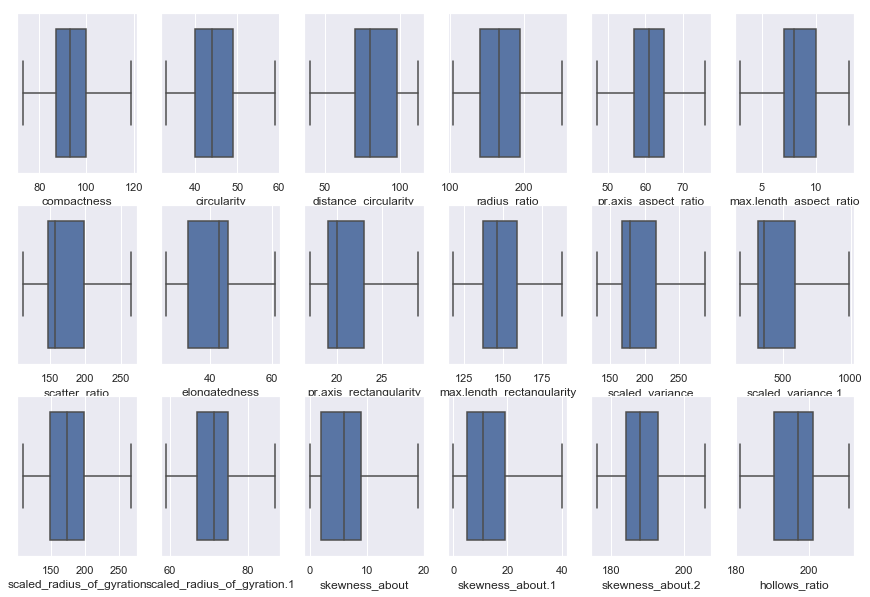

In [78]:
plt.figure(figsize=(15,10))
pos = 1
for i in df_veh.drop(columns = 'class').columns:
    plt.subplot(3, 6, pos)
    sns.boxplot(df_veh[i])
    pos += 1 

#Output of box plot after the Outlier treatment. 

D:\DataScience\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\DataScience\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


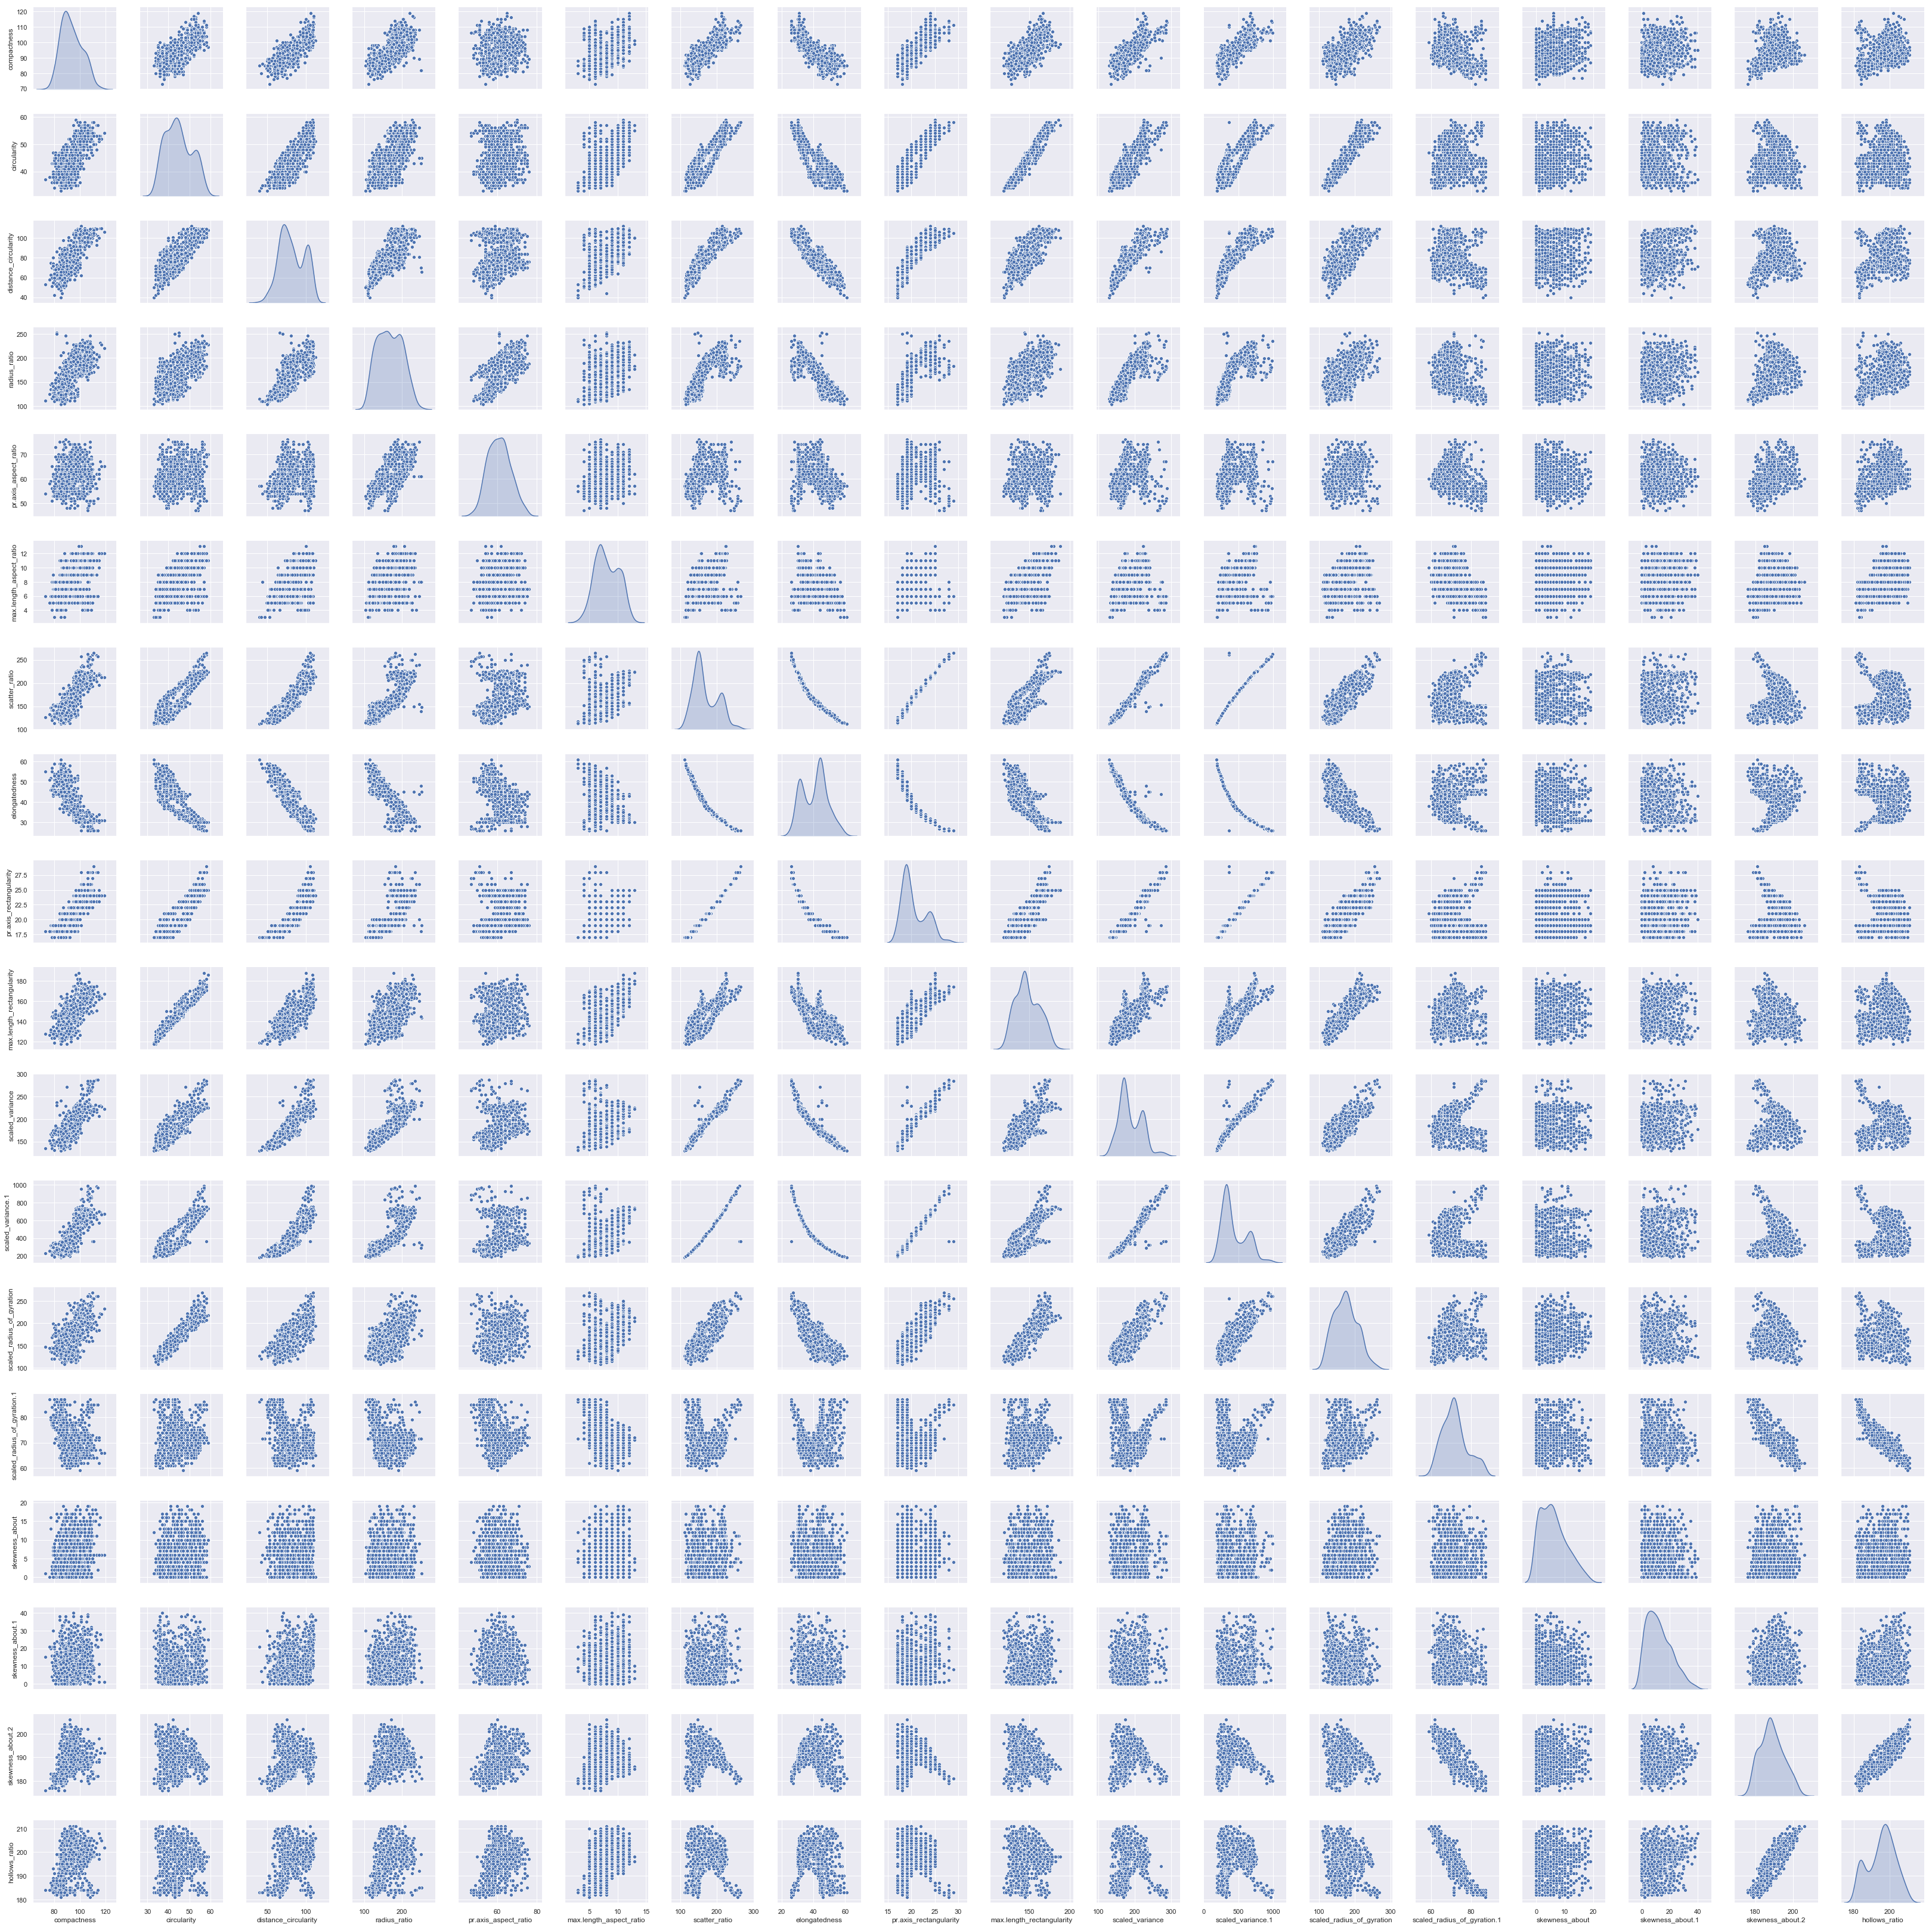

In [79]:
sns.pairplot(data =df_veh, diag_kind='kde')

In [80]:
corr = df_veh.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.723294     0.642603              0.799147   
pr.axis_aspect_ratio            0.193077     0.204222              0.244841   
max.length_aspect_ratio         0.499928     0.561809              0.667253   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.772172     0.813568              0.873862   
scaled_variance.1               0.810787     0.842577              0.888501   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.247476     0.070755             -0.230564   
skewness_about                  0.197970     0.137255              0.100078   
skewness_about.1                0.156995    -0.010094              0.262838   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.723294              0.193077   
circularity                      0.642603              0.204222   
distance_circularity             0.799147              0.244841   
radius_ratio                     1.000000              0.652970   
pr.axis_aspect_ratio             0.652970              1.000000   
max.length_aspect_ratio          0.466304              0.150459   
scatter_ratio                    0.774150              0.194255   
elongatedness                   -0.828931             -0.298646   
pr.axis_rectangularity           0.748678              0.163078   
max.length_rectangularity        0.581569              0.147887   
scaled_variance                  0.791128              0.207982   
scaled_variance.1                0.768033              0.197320   
scaled_radius_of_gyration        0.555857              0.149092   
scaled_radius_of_gyration.1     -0.392638             -0.321481   
skewness_about                   0.036191             -0.056174   
skewness_about.1                 0.180408             -0.021086   
skewness_about.2                 0.406587              0.401417   
hollows_ratio                    0.492846              0.415789   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812770   
circularity                                 0.561809       0.858265   
distance_circularity                        0.667253       0.907949   
radius_ratio                                0.466304       0.774150   
pr.axis_aspect_ratio                        0.150459       0.194255   
max.length_aspect_ratio                     1.000000       0.490667   
scatter_ratio                               0.490667       1.000000   
elongatedness                              -0.504120      -0.973504   
pr.axis_rectangularity                      0.488611       0.992078   
max.length_rectangularity                   0.642713       0.810017   
scaled_variance                             0.402062       0.963953   
scaled_variance.1                           0.465283       0.983725   
scaled_radius_of_gyration                   0.397646       0.800577   
scaled_radius_of_gyration.1                -0.335769       0.011016   
skewness_about                              0.081910       0.064237   
skewness_about.1                            0.141926       0.212729   
skewness_about.2                            0.

## 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

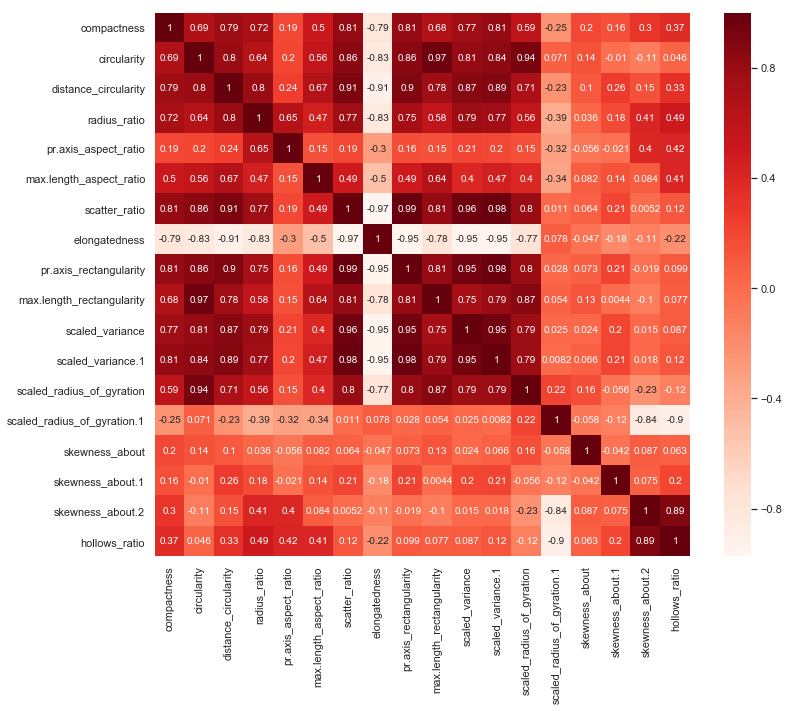

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#Above correlation matrix we can see that there are many features which are highly correlated. 

#Following are scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there 
#more than 0.9 correlation whose correlation is +-0.9 or above. 

#so there are 8 such columns: 
#max.length_rectangularity, scaled_radius_of_gyration,skewness_about.2,scatter_ratio,elongatedness,pr.axis_rectangularity,
#scaled_variance & scaled_variance.1

#Better than dropping this 8 columns, we will let PCA decide how it will explain above data which is in high dimension with smaller number of variables.

In [85]:
df_veh

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
5          107.0          NaN                 106.0         172.0   
6           97.0         43.0                  73.0         173.0   
7           90.0         43.0                  66.0         157.0   
8           86.0         34.0                  62.0         140.0   
9           93.0         44.0                  98.0           NaN   
10          86.0         36.0                  70.0         143.0   
11          90.0         34.0                  66.0         136.0   
12          88.0         46.0                  74.0         171.0   
13          89.0         42.0                  85.0         144.0   
14          94.0         49.0                  79.0         203.0   
15          96.0         55.0                 103.0         201.0   
16          89.0         36.0                  51.0         109.0   
17          99.0         41.0                  77.0         197.0   
18         104.0         54.0                 100.0         186.0   
19         101.0         56.0                 100.0         215.0   
20          84.0         47.0                  75.0         153.0   
21          84.0         37.0                  53.0         121.0   
22          94.0         43.0                  64.0         173.0   
23          87.0         39.0                  70.0         148.0   
24          99.0         53.0                 105.0         219.0   
25          85.0         45.0                  80.0         154.0   
26          83.0         36.0                  54.0         119.0   
27         107.0         54.0                  98.0         203.0   
28         102.0         45.0                  85.0         193.0   
29          80.0         38.0                  63.0         129.0   
..           ...          ...                   ...           ...   
816         90.0         48.0                  85.0         157.0   
817        104.0         53.0                 108.0         204.0   
818         95.0         43.0                  96.0         202.0   
819         93.0         42.0                  98.0         192.0   
820         87.0         38.0                  71.0         123.0   
821        104.0         56.0                  96.0         231.0   
822         95.0         41.0                  82.0         170.0   
823        105.0         54.0                 105.0         213.0   
824        106.0         55.0                  96.0         196.0   
825         86.0         39.0                  84.0         149.0   
826         95.0         49.0                  92.0         193.0   
827         99.0         57.0                 100.0         177.0   
828         89.0         42.0                  66.0         125.0   
829         95.0         49.0                  82.0         139.0   
830         97.0         37.0                  70.0         173.0   
831        100.0         47.0                  70.0         185.0   
832        108.0         49.0                 109.0         204.0   
833         92.0         46.0                  83.0         154.0   
834         82.0         36.0                  51.0         114.0   
835        111.0         58.0                 105.0         183.0   
836         87.0         45.0                  66.0         139.0   
837         94.0         46.0                  77.0         169.0   
838         95.0         43.0                  76.0         142.0   
839         90.0         44.0                  72.0         157.0   
840         93.0         34.0                  66.0         140.0   
841         93.0         39.0                  87.0         183.0   
842

In [139]:
df_veh_OnlyY.replace(['car','van','bus'],[0,1,2],inplace= True)

In [102]:
df_veh_OnlyY

0      1
1      1
2      0
3      1
4      2
5      2
6      2
7      1
8      1
9      0
10     1
11     0
12     2
13     1
14     2
15     0
16     1
17     2
18     0
19     0
20     2
21     1
22     2
23     2
24     0
25     1
26     0
27     0
28     2
29     0
      ..
816    1
817    0
818    0
819    0
820    0
821    0
822    1
823    0
824    0
825    0
826    0
827    0
828    1
829    1
830    2
831    2
832    0
833    0
834    0
835    2
836    1
837    0
838    1
839    1
840    0
841    0
842    1
843    0
844    0
845    1
Name: class, Length: 846, dtype: int64

In [140]:
df_veh

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
5            107         44.0                 106.0         172.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
9             93         44.0                  98.0         167.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0         203.0   
15            96         55.0                 103.0         201.0   
16            89         36.0                  51.0         109.0   
17            99         41.0                  77.0         197.0   
18           104         54.0                 100.0         186.0   
19           101         56.0                 100.0         215.0   
20            84         47.0                  75.0         153.0   
21            84         37.0                  53.0         121.0   
22            94         43.0                  64.0         173.0   
23            87         39.0                  70.0         148.0   
24            99         53.0                 105.0         219.0   
25            85         45.0                  80.0         154.0   
26            83         36.0                  54.0         119.0   
27           107         54.0                  98.0         203.0   
28           102         45.0                  85.0         193.0   
29            80         38.0                  63.0         129.0   
..           ...          ...                   ...           ...   
816           90         48.0                  85.0         157.0   
817          104         53.0                 108.0         204.0   
818           95         43.0                  96.0         202.0   
819           93         42.0                  98.0         192.0   
820           87         38.0                  71.0         123.0   
821          104         56.0                  96.0         231.0   
822           95         41.0                  82.0         170.0   
823          105         54.0                 105.0         213.0   
824          106         55.0                  96.0         196.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
827           99         57.0                 100.0         177.0   
828           89         42.0                  66.0         125.0   
829           95         49.0                  82.0         139.0   
830           97         37.0                  70.0         173.0   
831          100         47.0                  70.0         185.0   
832          108         49.0                 109.0         204.0   
833           92         46.0                  83.0         154.0   
834           82         36.0                  51.0         114.0   
835          111         58.0                 105.0         183.0   
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842

In [177]:
X = df_veh
y = df_veh_OnlyY

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 18), (170, 18), (676,), (170,))

In [179]:
from sklearn.svm import SVC

svm = SVC(C=1, gamma=1, kernel='rbf')

svm.fit(X_train, y_train)

pred = svm.predict(X_test)

In [145]:
# check the accuracy on the training set
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.5058823529411764


In [180]:
# make predictions
expected = y_test
predicted = svm.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        86
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        44

    accuracy                           0.51       170
   macro avg       0.17      0.33      0.22       170
weighted avg       0.26      0.51      0.34       170

[[86  0  0]
 [40  0  0]
 [44  0  0]]


D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Unscaled date not performed well, so trying to scale and see the performance.

In [174]:
df_Veh_attr=df_veh.iloc[:,1:]
df_Veh_Scaled=df_Veh_attr.apply(zscore)

In [175]:
X_Scaled = df_Veh_Scaled
y = df_veh_OnlyY


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 17), (170, 17), (676,), (170,))

## 4. Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 

In [169]:
svm_scaled = SVC(C=1, gamma=1, kernel='rbf')

svm_scaled.fit(X_train, y_train)

pred = svm_scaled.predict(X_test)

In [170]:
# check the accuracy on the training set
print(svm_scaled.score(X_train, y_train))
print(svm_scaled.score(X_test, y_test))

1.0
0.8647058823529412


In [172]:
# make predictions
expected = y_test
predicted_Scaled = svm_scaled.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        86
           1       0.96      0.68      0.79        40
           2       0.97      0.80      0.88        44

    accuracy                           0.86       170
   macro avg       0.91      0.82      0.85       170
weighted avg       0.88      0.86      0.86       170

[[85  1  0]
 [12 27  1]
 [ 9  0 35]]


#After scaled its perfomed better than previous with 86% test accuracy and Precision @ 80,96,97 %.

In [163]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [214]:
covMatrix = np.cov(X_Scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.79325751  0.6216467   0.15396023  0.25176438  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.76794246  0.15864319  0.26499957  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.6216467   0.76794246  1.00118343  0.66423242  0.45058426  0.73529816
  -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.15396023  0.15864319  0.66423242  1.00118343  0.64949139  0.10385472
  -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427  0.12211524
   0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.25176438  0.26499957  0.45058426  0.64949139  1.00118343  0.16638787
  -0.18035326  0.16169312  0.30630475  0.31933428  0.1434227   0.18996732
   0.2960

## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [217]:
from sklearn.decomposition import PCA

In [218]:
pca = PCA(n_components=6)
pca.fit(X_Scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [219]:
print(pca.explained_variance_)

[8.71790618 2.96613431 1.87624689 1.17330772 0.91344716 0.53301581]


In [220]:
print(pca.components_)

[[ 0.30716806  0.31526104  0.27692133  0.08769365  0.1053014   0.32916124
  -0.32633382  0.32565836  0.2957178   0.32239989  0.32541872  0.28711183
  -0.01179208  0.03788366  0.05946042  0.0209435   0.06804691]
 [ 0.11059145 -0.08957193 -0.21290718 -0.14562561 -0.0085409   0.03409268
   0.02959288  0.0470214   0.10228965  0.04502484  0.04076153  0.19545358
   0.48765549 -0.04836948 -0.12967485 -0.54518867 -0.54985485]
 [-0.03347052 -0.07532171  0.2564833   0.63587934  0.59489136 -0.11078503
   0.07528861 -0.12121913 -0.02436481  0.04566162 -0.12087822 -0.03669583
   0.31284553 -0.10605637 -0.09202551 -0.01220674  0.01318744]
 [ 0.19910028 -0.05984492 -0.03906584  0.02425269  0.01512196 -0.08742121
   0.07069244 -0.08516803  0.1980575  -0.11701852 -0.08415307  0.2110097
  -0.08748015  0.59818676 -0.66924685  0.114439    0.05955182]
 [-0.07062272  0.05004981 -0.04418936 -0.04431171  0.20673007 -0.01174039
   0.07026115  0.00513253 -0.04731151 -0.00152259 -0.01686938 -0.04701274
   0.1280

In [221]:
print(pca.explained_variance_ratio_)

[0.51221184 0.17427225 0.11023701 0.06893652 0.05366867 0.03131681]


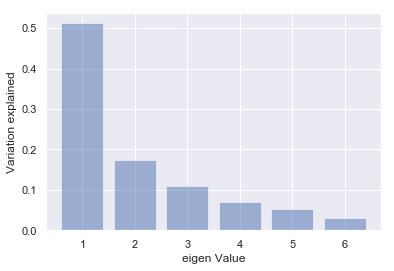

In [222]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

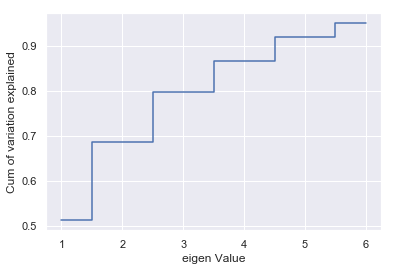

In [223]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#From above we can see that 6 may be the ideal dimension are able to explain 95%variance of data. Will explore further.

In [230]:
Xpca3

array([[ 0.30984644, -0.24821846,  0.99813671,  0.16354792,  0.08392881],
       [-1.57384909, -0.36935611, -0.35356467,  0.2252283 ,  0.70270678],
       [ 3.5612674 ,  0.17294041,  0.11881201,  1.17751619,  0.74196843],
       ...,
       [ 4.57850548, -0.07063567,  0.51762236,  0.30147809, -1.35763321],
       [-3.17214734, -0.9709241 , -0.412041  , -1.91475798,  0.02370373],
       [-4.64726933,  0.45714557, -0.50405802, -1.25284079, -0.10173518]])

In [242]:
cov_matrix = np.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00118343  0.79325751  0.6216467   0.15396023  0.25176438  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.76794246  0.15864319  0.26499957  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.6216467   0.76794246  1.00118343  0.66423242  0.45058426  0.73529816
  -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.15396023  0.15864319  0.66423242  1.00118343  0.64949139  0.10385472
  -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427  0.12211524
   0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.25176438  0.26499957  0.45058426  0.64949139  1.00118343  0.16638787
  -0.18035326  0.16169312  0.30630475  0.31933428  0.1434227 

In [228]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 51.22118426  68.64840922  79.67210983  86.56576179  91.93262905
  95.06431005  96.93682996  98.02961373  98.62629623  99.0188069
  99.29283837  99.5298054   99.69355694  99.81456875  99.92353654
  99.9824758  100.        ]


#From above it is certain the Cumulative Variance = 95% is starting at 6 of dimension are able to explain 95%variance of data. but we will examine both 6 and 7 on the principal component because it variance difference between the two is in fractions.

In [ ]:
From the above cumulative variance the 95% 

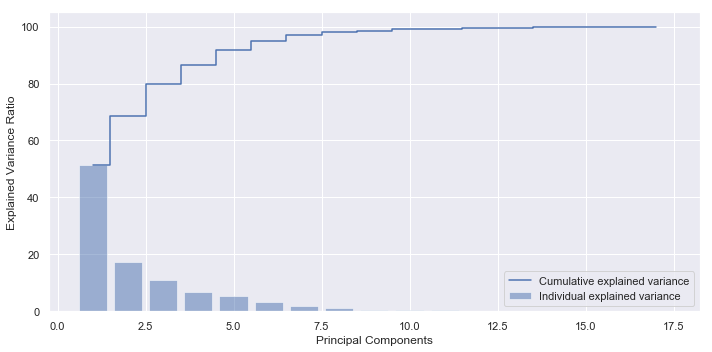

In [243]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#From above we can see that 7 or 6 dimension are able to explain 95%variance of data. so we will use first 7 principal components

In [252]:
pca7 = PCA(n_components=7)
pca7.fit(X_Scaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(X_Scaled)

[[ 0.30716806  0.31526104  0.27692133  0.08769365  0.1053014   0.32916124
  -0.32633382  0.32565836  0.2957178   0.32239989  0.32541872  0.28711183
  -0.01179208  0.03788366  0.05946042  0.0209435   0.06804691]
 [ 0.11059145 -0.08957193 -0.21290718 -0.14562561 -0.0085409   0.03409268
   0.02959288  0.0470214   0.10228965  0.04502484  0.04076153  0.19545358
   0.48765549 -0.04836948 -0.12967485 -0.54518867 -0.54985485]
 [-0.03347052 -0.07532171  0.2564833   0.63587934  0.59489136 -0.11078503
   0.07528861 -0.12121913 -0.02436481  0.04566162 -0.12087822 -0.03669583
   0.31284553 -0.10605637 -0.09202551 -0.01220674  0.01318744]
 [ 0.19910028 -0.05984492 -0.03906584  0.02425269  0.01512196 -0.08742121
   0.07069244 -0.08516803  0.1980575  -0.11701852 -0.08415307  0.2110097
  -0.08748015  0.59818676 -0.66924685  0.114439    0.05955182]
 [-0.07062272  0.05004981 -0.04418936 -0.04431171  0.20673007 -0.01174039
   0.07026115  0.00513253 -0.04731151 -0.00152259 -0.01686938 -0.04701274
   0.1280

In [259]:
pca6 = PCA(n_components=6)
pca6.fit(X_Scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_Scaled)

[[ 0.30716806  0.31526104  0.27692133  0.08769365  0.1053014   0.32916124
  -0.32633382  0.32565836  0.2957178   0.32239989  0.32541872  0.28711183
  -0.01179208  0.03788366  0.05946042  0.0209435   0.06804691]
 [ 0.11059145 -0.08957193 -0.21290718 -0.14562561 -0.0085409   0.03409268
   0.02959288  0.0470214   0.10228965  0.04502484  0.04076153  0.19545358
   0.48765549 -0.04836948 -0.12967485 -0.54518867 -0.54985485]
 [-0.03347052 -0.07532171  0.2564833   0.63587934  0.59489136 -0.11078503
   0.07528861 -0.12121913 -0.02436481  0.04566162 -0.12087822 -0.03669583
   0.31284553 -0.10605637 -0.09202551 -0.01220674  0.01318744]
 [ 0.19910028 -0.05984492 -0.03906584  0.02425269  0.01512196 -0.08742121
   0.07069244 -0.08516803  0.1980575  -0.11701852 -0.08415307  0.2110097
  -0.08748015  0.59818676 -0.66924685  0.114439    0.05955182]
 [-0.07062272  0.05004981 -0.04418936 -0.04431171  0.20673007 -0.01174039
   0.07026115  0.00513253 -0.04731151 -0.00152259 -0.01686938 -0.04701274
   0.1280

In [253]:
svm_sc = SVC(C=1, gamma=1, kernel='rbf')

svm_sc.fit(Xpca7, y)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [254]:
pred = svm_sc.predict(Xpca7)

In [255]:
print(svm_sc.score(Xpca7, y))


0.9929078014184397


In [265]:
svm_sc = SVC(C=1, gamma=1, kernel='rbf')

svm_sc.fit(Xpca6, y)



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [266]:
pred = svm_sc.predict(Xpca6)

In [267]:
# check the accuracy on the training set
print(svm_sc.score(Xpca6, y))


0.9846335697399528


#Looks like by drop reducing dimensionality by 1, is likely to do better since that would be less of an over-fit.